<a href="https://colab.research.google.com/github/jung0228/ML/blob/main/%EC%A3%BC%EC%8B%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1_2%EC%A3%BC%EC%B0%A8_%EC%A3%BC%EC%84%9D%EB%8B%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터/라이브러리 불러오기


In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

import plotly.io as pio
pio.renderers.default = 'colab'

# Set seeds to make the experiment more reproducible.
from tensorflow.random import set_seed
from numpy.random import seed
set_seed(1)
seed(1)

In [ ]:
fund = pd.read_csv("fundamentals.csv")
secur = pd.read_csv("securities.csv")
price = pd.read_csv("prices.csv")
df = pd.read_csv("prices-split-adjusted.csv", index_col = 0)
df

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2011-06-10,V,19.052500,18.672501,18.637501,19.077499,29456800.0
2011-06-10,VAR,66.050003,65.480003,65.360001,66.099998,853500.0
2011-06-10,VFC,23.242500,22.950001,22.905001,23.430000,4783200.0


# 데이터 관찰하기

In [ ]:
num = 0
for i in fund.columns:
  num += 1
print(num)

79


In [ ]:
price.columns

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')

In [ ]:
secur.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters', 'Date first added',
       'CIK'],
      dtype='object')

In [ ]:
fund[0:10]

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-2.220000e+08,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,1.270000e+08,1.049900e+10,78.0,0.000000e+00,2.230000e+08,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.000000e+00,0.0,0.0,-1.020000e+09,1.970000e+08,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,1.100000e+07,1.514700e+10,-1.410000e+08,8.450000e+08,10.0,31.0,8.0,72.0,0.000000e+00,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-9.300000e+07,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5.000000e+06,1.101900e+10,104.0,0.000000e+00,9.350000e+08,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.000000e+00,0.0,0.0,2.208000e+09,6.600000e+08,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,4.810000e+08,1.491500e+10,-5.600000e+07,8.530000e+08,8.0,80.0,7.0,96.0,0.000000e+00,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-1.600000e+08,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7.000000e+06,1.562000e+10,88.0,0.000000e+00,8.290000e+08,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.000000e+00,0.0,0.0,1.700000e+08,-1.460000e+08,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,6.010000e+08,1.092800e+10,-5.000000e+08,1.295000e+09,8.0,159.0,7.0,80.0,0.0000

In [ ]:
print(fund['Ticker Symbol'][0:300].unique())

['AAL' 'AAP' 'AAPL' 'ABBV' 'ABC' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADS' 'ADSK'
 'AEE' 'AEP' 'AFL' 'AIG' 'AIV' 'AIZ' 'AJG' 'AKAM' 'ALB' 'ALK' 'ALL' 'ALLE'
 'ALXN' 'AMAT' 'AME' 'AMG' 'AMGN' 'AMP' 'AMT' 'AMZN' 'AN' 'ANTM' 'AON'
 'APA' 'APC' 'APD' 'APH' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'BA' 'BAC' 'BAX' 'BBBY' 'BBT' 'BBY' 'BCR' 'BDX' 'BHI' 'BIIB'
 'BK' 'BLL' 'BMY' 'BSX' 'BWA' 'BXP' 'C' 'CAG' 'CAH' 'CAT' 'CB' 'CBG' 'CCI'
 'CCL' 'CELG' 'CERN' 'CF' 'CFG' 'CHD']


In [ ]:
fund_some = fund[['Ticker Symbol','Period Ending','Earnings Per Share','Cash Ratio']]
fund_some[fund_some['Ticker Symbol'] == 'AAL']

,Ticker Symbol,Period Ending,Earnings Per Share,Cash Ratio
0,AAL,2012-12-31,-5.60,53.0
1,AAL,2013-12-31,-11.25,75.0
2,AAL,2014-12-31,4.02,60.0
3,AAL,2015-12-31,11.39,51.0


In [ ]:
price[price.symbol == "AAL"]

,date,symbol,open,close,low,high,volume
252,2010-01-04,AAL,4.84,4.77,4.66,4.94,9837300.0
719,2010-01-05,AAL,4.79,5.31,4.71,5.37,25212000.0
1187,2010-01-06,AAL,5.19,5.09,5.00,5.38,16597900.0
1655,2010-01-07,AAL,5.06,5.24,5.05,5.43,14033400.0
2123,2010-01-08,AAL,5.27,5.14,5.06,5.43,12760000.0
...,...,...,...,...,...,...,...
174320,2011-06-23,AAL,8.75,8.91,8.67,9.04,9175700.0
174790,2011-06-24,AAL,8.68,8.69,8.34,8.73,9727600.0
175260,2011-06-27,AAL,8.73,9.15,8.70,9.26,9019900.0
175730,2011-06-28,AAL,9.15,9.13,8.91,9.21,5230600.0


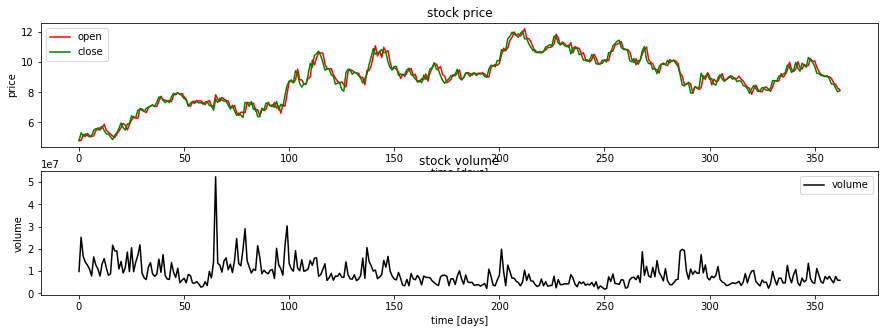

In [ ]:
plt.figure(figsize=(15, 5));
plt.subplot(2,1,1);
plt.plot(df[df.symbol == 'AAL'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'AAL'].close.values, color='green', label='close')
#plt.plot(df[df.symbol == 'AAL'].low.values, color='blue', label='low')
#plt.plot(df[df.symbol == 'AAL'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(2,1, 2);
plt.plot(df[df.symbol == 'AAL'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

plt.show()

In [ ]:
def show_time(diff):
   m, s = divmod(diff, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
AAL_df = price[price.symbol == "AAL"]

In [ ]:
del AAL_df['symbol']
AAL_df

,date,open,close,low,high,volume
252,2010-01-04,4.84,4.77,4.66,4.94,9837300.0
719,2010-01-05,4.79,5.31,4.71,5.37,25212000.0
1187,2010-01-06,5.19,5.09,5.00,5.38,16597900.0
1655,2010-01-07,5.06,5.24,5.05,5.43,14033400.0
2123,2010-01-08,5.27,5.14,5.06,5.43,12760000.0
...,...,...,...,...,...,...
174320,2011-06-23,8.75,8.91,8.67,9.04,9175700.0
174790,2011-06-24,8.68,8.69,8.34,8.73,9727600.0
175260,2011-06-27,8.73,9.15,8.70,9.26,9019900.0
175730,2011-06-28,9.15,9.13,8.91,9.21,5230600.0


In [ ]:
print('Min date from train set: %s' % AAL_df['date'].min())
print('Max date from train set: %s' % AAL_df['date'].max())

Min date from train set: 2010-01-04
Max date from train set: 2011-06-29


# 데이터 처리하기

In [ ]:
# function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df['close'].values.reshape(-1,1))
    return df

# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    print(data_raw)
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])

    valid_set_size_percentage = 10
    test_set_size_percentage = 10

    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]


In [ ]:
# choose one stock
df_stock = df[df.symbol == 'AAL'].copy()
df_stock.drop(['symbol'],1,inplace=True)
df_stock.drop(['volume'],1,inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['open', 'close', 'low', 'high']
[[0.00671141 0.         0.02567568 0.        ]
 [0.         0.0739726  0.03243243 0.05874317]
 [0.05369128 0.04383562 0.07162162 0.06010929]
 ...
 [0.49932886 0.47808219 0.50540541 0.51229508]
 [0.46845638 0.44794521 0.47972973 0.46857923]
 [0.45100671 0.45616438 0.48378378 0.45491803]]
x_train.shape =  (275, 19, 4)
y_train.shape =  (275, 4)
x_valid.shape =  (34, 19, 4)
y_valid.shape =  (34, 4)
x_test.shape =  (34, 19, 4)
y_test.shape =  (34, 4)


# 모델 사용해보기

In [ ]:
# Models
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lightgbm.plotting import plot_importance
import lightgbm
import xgboost as xgb
from xgboost import plot_tree

데이터를 한 번 그려본 것이다.

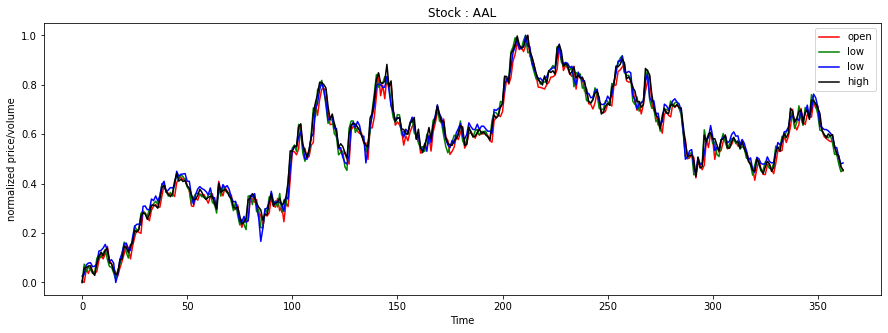

In [ ]:
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('Stock : AAL') 
plt.xlabel('Time') 
plt.ylabel('normalized price/volume') 
plt.legend(loc='best') 
plt.show() 

In [ ]:
### Basic Cell RNN in tensorflow

# tf.function : 즉시 실행을 활성화/비활성화합니다 
tf.config.run_functions_eagerly(True)

index_in_epoch = 0;
#np.arange(3) => array([0, 1, 2])
perm_array  = np.arange(x_train.shape[0])
#섞어
np.random.shuffle(perm_array)
print(x_train.shape[0])

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   # 전역 변수를 쓰겠다.
    start = index_in_epoch                  # 배치의 시작은 인덱스 에서 시작
    index_in_epoch += batch_size            # 배치 사이즈 만큼 인덱스 증가
    
    if index_in_epoch > x_train.shape[0]:   # 인덱스가 275 보다 크다면
        np.random.shuffle(perm_array)       # shuffle permutation array
        start = 0                           # start next epoch
        index_in_epoch = batch_size         # 배치는 배치 사이즈 만큼의 크기에서 시작함
        
    end = index_in_epoch                    # 배치의 끝은 인덱스
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]  # x_train, y_train 리턴해주는 데 start에서 end까지


275


In [ ]:
# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4 
n_layers = 2 
learning_rate = 0.001 
batch_size = 50 
n_epochs = 100 
train_set_size = x_train.shape[0] 
test_set_size = x_test.shape[0] 

In [ ]:
tf.compat.v1.reset_default_graph() 
tf.compat.v1.disable_eager_execution() # 활성 함수 (?) 
# 인풋이 X 
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs]) #자리를 공급...? 무엇에 대한 자리지? 
# 아웃풋이 y 
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs]) 

# use Basic RNN Cell 
layers = [tf.compat.v1.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu) 
          for layer in range(n_layers)]  
# 뉴런 수 : 200개, 활성함수 : tf.nn.elu (ReLu 비슷한 것임) <= 레이어 수만큼 반복 


multi_layer_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers) #만든 레이어들을 MultiRNNCell
# RNNCell cell 로 지정된 반복 신경 네트워크를 만듭니다 .
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
  

In [ ]:
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.compat.v1.train.AdamOptimizer(
    learning_rate=0.001, 
    name='Adam'
)
training_op = optimizer.minimize(loss)
# The first step is `-learning_rate*sign(grad)`
# run graph

In [ ]:
with tf.compat.v1.Session() as sess: 
    sess.run(tf.compat.v1.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0.00 epochs: MSE train/valid = 0.045538/0.019179
4.91 epochs: MSE train/valid = 0.007666/0.008048
9.82 epochs: MSE train/valid = 0.003782/0.003327
14.73 epochs: MSE train/valid = 0.003021/0.002423
19.64 epochs: MSE train/valid = 0.002549/0.001785
24.55 epochs: MSE train/valid = 0.003333/0.003105
29.45 epochs: MSE train/valid = 0.002361/0.001834
34.36 epochs: MSE train/valid = 0.002722/0.001906
39.27 epochs: MSE train/valid = 0.001801/0.001441
44.18 epochs: MSE train/valid = 0.001725/0.001430
49.09 epochs: MSE train/valid = 0.001599/0.001362
54.00 epochs: MSE train/valid = 0.001620/0.001487
58.91 epochs: MSE train/valid = 0.001439/0.001244
63.82 epochs: MSE train/valid = 0.001456/0.001347
68.73 epochs: MSE train/valid = 0.001545/0.001237
73.64 epochs: MSE train/valid = 0.001326/0.001246
78.55 epochs: MSE train/valid = 0.001427/0.001172
83.45 epochs: MSE train/valid = 0.001215/0.001200
88.36 epochs: MSE train/valid = 0.001230/0.001146
93.27 epochs: MSE train/valid = 0.001148/0.001107
98.

In [ ]:
y_train.shape

(275, 4)

correct sign prediction for close - open price for train/valid/test: 0.68/0.56/0.53


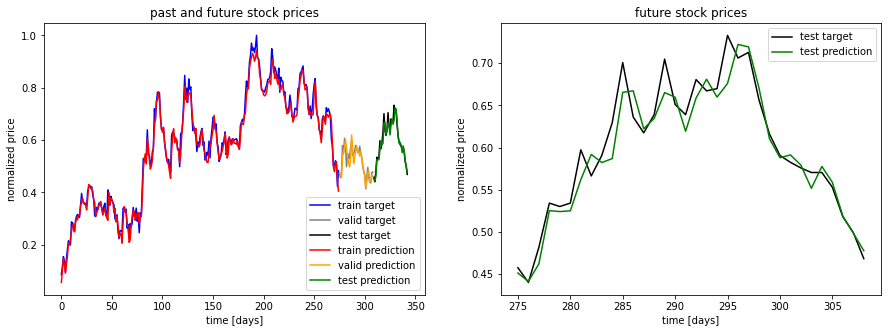

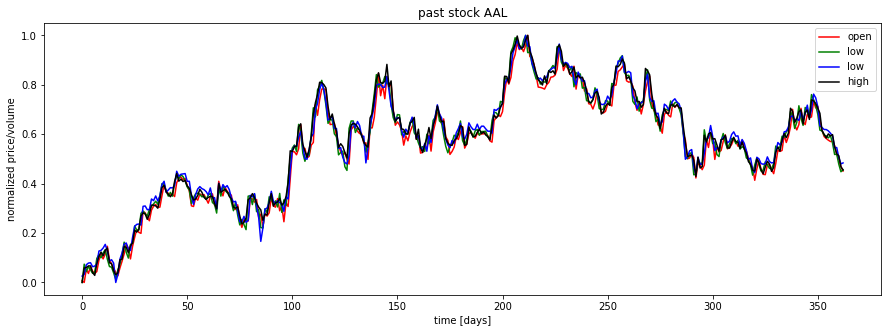

In [ ]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('past and future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best');

corr_price_development_train = np.sum(np.equal(np.sign(y_train[:,1]-y_train[:,0]),
            np.sign(y_train_pred[:,1]-y_train_pred[:,0])).astype(int)) / y_train.shape[0]
corr_price_development_valid = np.sum(np.equal(np.sign(y_valid[:,1]-y_valid[:,0]),
            np.sign(y_valid_pred[:,1]-y_valid_pred[:,0])).astype(int)) / y_valid.shape[0]
corr_price_development_test = np.sum(np.equal(np.sign(y_test[:,1]-y_test[:,0]),
            np.sign(y_test_pred[:,1]-y_test_pred[:,0])).astype(int)) / y_test.shape[0]

print('correct sign prediction for close - open price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))

# 과거의 데이터
plt.figure(figsize=(15, 5));
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='low')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
#plt.plot(df_stock_norm.volume.values, color='gray', label='volume')
plt.title('past stock AAL')
plt.xlabel('time [days]')
plt.ylabel('normalized price/volume')
plt.legend(loc='best')
plt.show()

In [1]:
# Python3 샘플 코드 #


import requests

url = 'http://api.seibro.or.kr/openapi/service/StockSvc/getKDRSecnInfo'
params ={'serviceKey' : '서비스키', 'caltotMartTpcd' : '12' }

response = requests.get(url, params=params)
print(response.content)

b'<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultCode>99</resultCode><resultMsg>SERVICE KEY IS NOT REGISTERED ERROR.</resultMsg></header></response>'
